In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import Arc

In [82]:
data = pd.read_csv('./PbP.BDB.csv')

/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_73069/1699013710.py:1: DtypeWarning: Columns (39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./PbP.BDB.csv')


In [83]:
data.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description
0,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN
1,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Pachulia vs. Capela: Tip to Anderson
2,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,made,NaN,unknown,2.0,-10,16,26,6.6,Harden 2' Driving Layup (2 PTS)
3,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,missed,NaN,Jump Shot,25.0,9,254,25.9,63.6,MISS Green 25' 3PT Jump Shot
4,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,NaN,NaN,rebound defensive,NaN,NaN,NaN,NaN,NaN,Capela REBOUND (Off:0 Def:1)


In [84]:
data['original_x'] = pd.to_numeric(data['original_x'], errors='coerce')
data['original_y'] = pd.to_numeric(data['original_y'], errors='coerce')

In [85]:
subdata = data[data['player'] == "Stephen Curry"].copy()
subdata['xx'] = subdata['original_x'] 
subdata['yy'] = subdata['original_y']  - 10

In [86]:
def draw_court(ax=None,color='black',lw=2,outer_lines=False):
    if ax is None:
        ax = plt.gca()
    hoop = Circle((0,0),radius=7.5,linewidth=lw,color=color,fill=False)
    backboard = Rectangle((-30,-7.5),60,-1,linewidth=lw,color=color)
    outer_box = Rectangle((-80,-47.5),160,190,linewidth=lw,color=color,fill=False)
    inner_box = Rectangle((-60,-47.5),120,190,linewidth=lw,color=color,fill=False)
    top_free_throw = Arc((0,142.5),120,120,theta1=0,theta2=180,linewidth=lw,color=color,fill=False)
    bottom_free_throw = Arc((0,142.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color,linestyle='dashed')
    restricted = Arc((0,0),80,80,theta1=0,theta2=180,linewidth=lw,color=color)
    corner_three_a = Rectangle((-220,-47.5),0,140,linewidth=lw,color=color)
    corner_three_b = Rectangle((220,-47.5),0,140,linewidth=lw,color=color)
    three_arc = Arc((0,0),475,475,theta1=22,theta2=158,linewidth=lw,color=color)
    center_outer_arc = Arc((0,422.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color)
    center_inner_arc = Arc((0,422.5),40,40,theta1=180,theta2=0,linewidth=lw,color=color)
    court_elements = [hoop, backboard,outer_box,inner_box,top_free_throw,bottom_free_throw,restricted,corner_three_a,corner_three_b,three_arc,center_outer_arc,center_inner_arc]
    
    if outer_lines:
        outer_lines = Rectangle((-250,-47.5),500,470,linewidth=lw,color=color,fill=False)
        court_elements.append(outer_lines)
    for element in court_elements:
        ax.add_patch(element)
    return ax

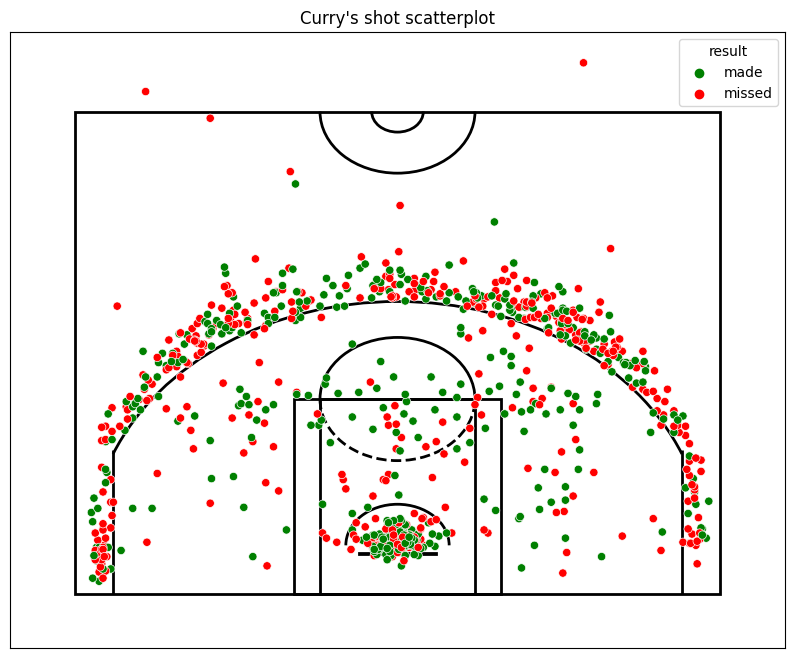

In [147]:
fig, ax = plt.subplots(figsize=(10, 8))
draw_court(ax, outer_lines=True)

colors = {'made': 'green', 'missed': 'red'}
c = subdata['result'].apply(lambda x: colors.get(x, 'black'))

sns.scatterplot(x='xx', y='yy', hue='result', data=subdata, palette=colors)

ax.set_title("Curry's shot scatterplot")
ax.set_xlabel('')
ax.set_ylabel('')

# img = mpimg.imread('./photo.jpg')
# ax.imshow(img, aspect='auto', extent=(-300, -230, -100, -10))

# 隐藏x轴和y轴
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

ax.set_xlim(-300, 300)
ax.set_ylim(-100, 500)
plt.show()

In [148]:
fig.savefig("shot_scatterplot.png", dpi=300, bbox_inches='tight')

In [91]:
# Filter the data to only include shots taken by Stephen Curry
curry_shots = data[(data['player'] == "Stephen Curry") & (data['result'].isin(['made', 'missed']))]

# Group by shot type and calculate the shooting percentage
shot_stats = curry_shots.groupby('type').apply(lambda x: x[x['result'] == 'made'].shape[0] / x.shape[0]).reset_index()
shot_stats.columns = ['type', 'shooting_scoring_rate']

shot_stats.sort_values(by='shooting_scoring_rate', ascending=False, inplace=True)

shot_stats

,type,shooting_scoring_rate
17,Putback Layup,1.000000
24,Turnaround Hook Shot,1.000000
19,Running Finger Roll Layup,1.000000
6,Free Throw 1 of 2,0.943925
10,Free Throw 3 of 3,0.937500
8,Free Throw 2 of 2,0.915888
5,Free Throw 1 of 1,0.900000
11,Free Throw Technical,0.900000
7,Free Throw 1 of 3,0.875000
9,Free Throw 2 of 3,0.875000


In [120]:
drop_list = ['Hook Shot','Finger Roll Layup','Fadeaway Jumper','Jump Bank Shot','Free Throw 1 of 2','Free Throw 3 of 3',
             'Free Throw 2 of 2','Free Throw 1 of 1','Free Throw 1 of 3','Free Throw 2 of 3','unknown','Putback Layup'
             ,'Turnaround Hook Shot','Running Finger Roll Layup']
shot_stats = shot_stats[~shot_stats['type'].isin(drop_list)]
shot_stats

,type,shooting_scoring_rate
11,Free Throw Technical,0.900000
0,Driving Finger Roll Layup,0.807692
21,Running Layup,0.727273
1,Driving Reverse Layup,0.692308
22,Running Reverse Layup,0.666667
18,Reverse Layup,0.666667
16,Pullup Jump Shot,0.643564
4,Floating Jump Shot,0.642857
23,Step Back Jump Shot,0.625000
20,Running Jump Shot,0.588235


In [125]:
shot_stats['shooting_scoring_rate'] = round(shot_stats['shooting_scoring_rate'],2)
shot_stats

/var/folders/fg/q9vq8s1s467df4k3plvy57b00000gn/T/ipykernel_73069/871721523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_stats['shooting_scoring_rate'] = round(shot_stats['shooting_scoring_rate'],2)


,type,shooting_scoring_rate
11,Free Throw Technical,0.90
0,Driving Finger Roll Layup,0.81
21,Running Layup,0.73
1,Driving Reverse Layup,0.69
22,Running Reverse Layup,0.67
18,Reverse Layup,0.67
16,Pullup Jump Shot,0.64
4,Floating Jump Shot,0.64
23,Step Back Jump Shot,0.62
20,Running Jump Shot,0.59


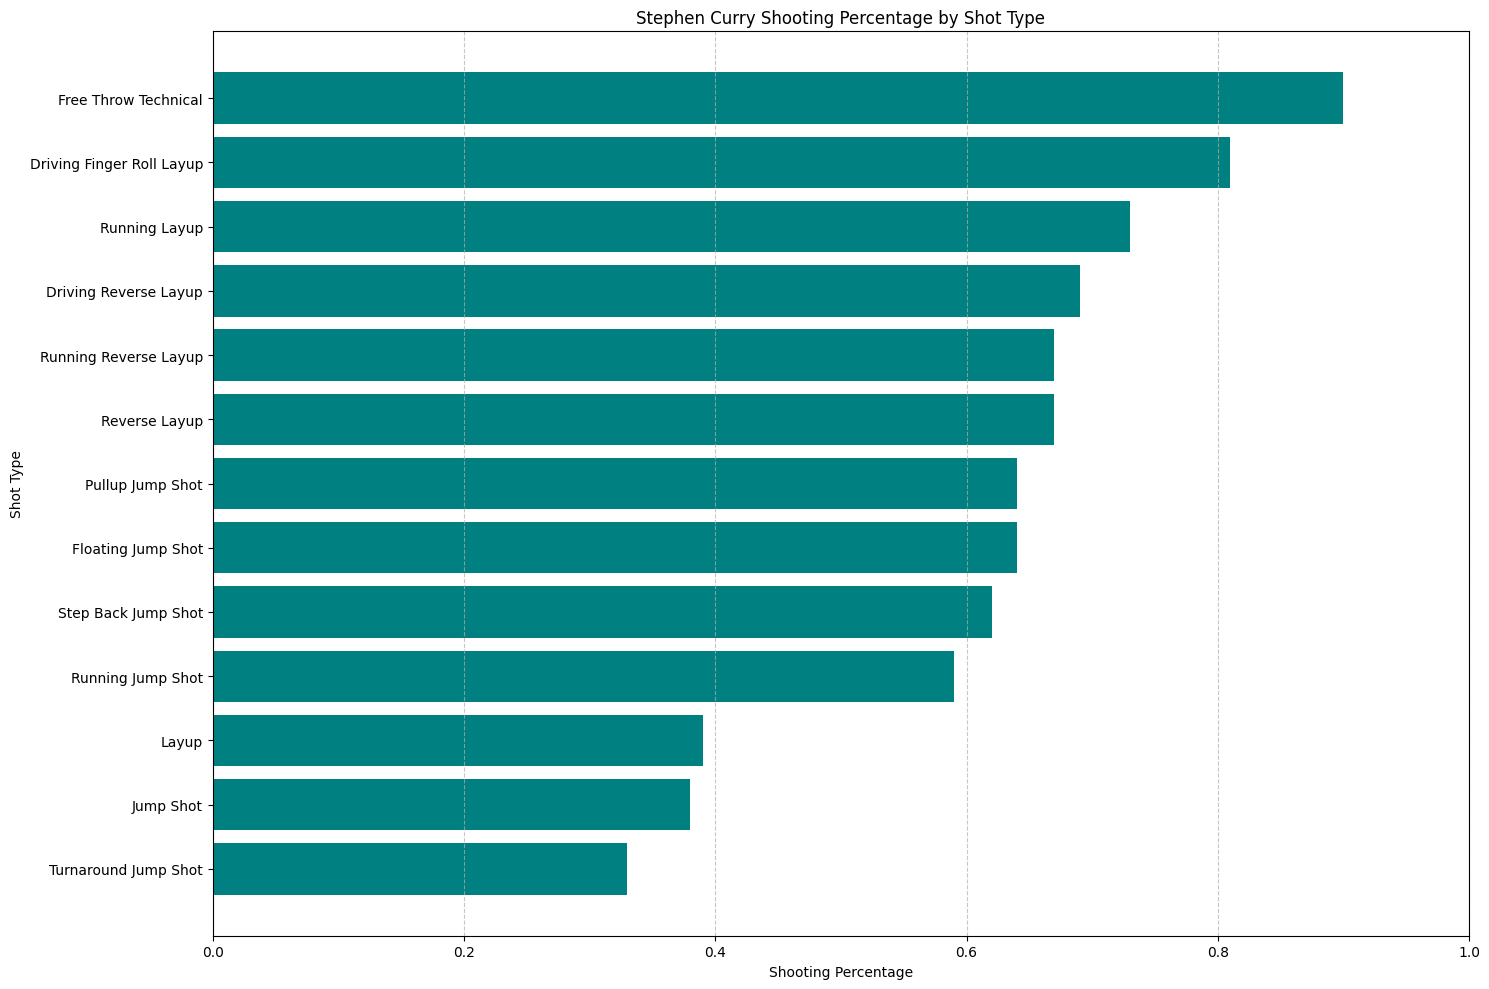

In [126]:
plt.figure(figsize=(15, 10))
plt.barh(shot_stats['type'], shot_stats['shooting_scoring_rate'], color='teal')
plt.xlabel('Shooting Percentage')
plt.ylabel('Shot Type')
plt.title('Stephen Curry Shooting Percentage by Shot Type')
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

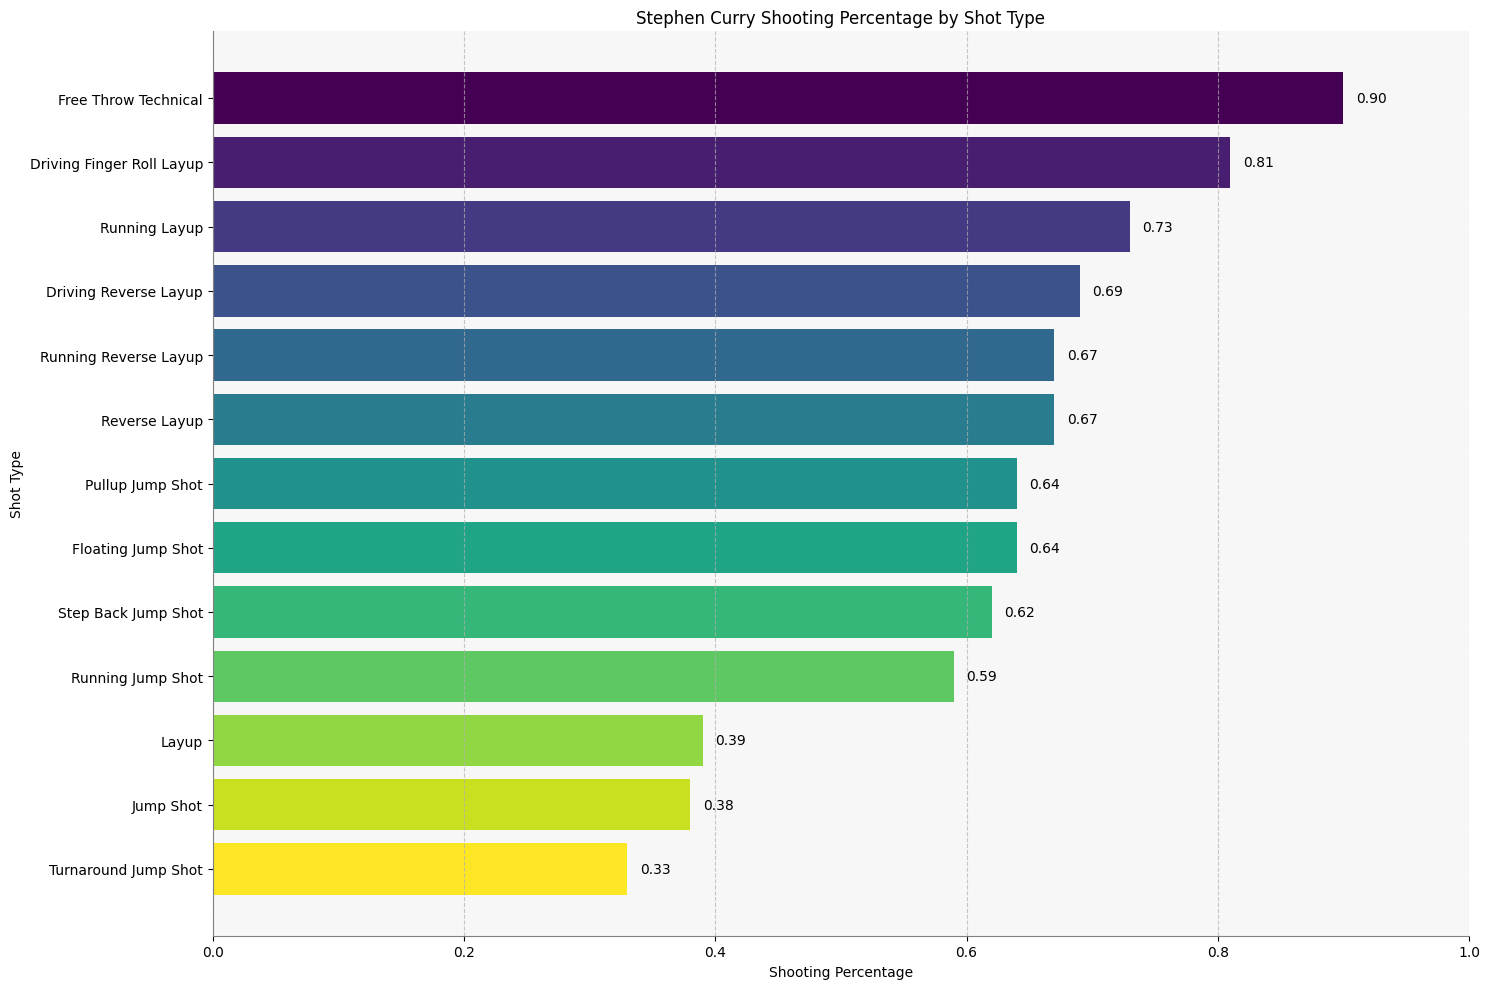

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# 生成颜色渐变
colors = plt.cm.viridis(np.linspace(0, 1, len(shot_stats)))

plt.figure(figsize=(15, 10))

# 创建带有颜色渐变和数据标签的条形图
for i, (type, rate) in enumerate(zip(shot_stats['type'], shot_stats['shooting_scoring_rate'])):
    plt.barh(type, rate, color=colors[i])
    plt.text(rate + 0.01, i, f'{rate:.2f}', va='center')

# 设置坐标轴和标题
plt.xlabel('Shooting Percentage')
plt.ylabel('Shot Type')
plt.title('Stephen Curry Shooting Percentage by Shot Type')
plt.xlim(0, 1)

# 反转y轴顺序，自定义网格线样式
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 添加背景和定制样式
plt.gca().set_facecolor('#f7f7f7')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

plt.tight_layout()
plt.show()


In [146]:
from pyecharts import options as opts
from pyecharts.charts import Polar
from pyecharts.commons.utils import JsCode

# 创建极坐标系下的条形图
polar = Polar(init_opts=opts.InitOpts(width="1200px", height="800px"))

# 设置极坐标系的配置
polar.add_schema(
    angleaxis_opts=opts.AngleAxisOpts(max_=1, start_angle=75),
    radiusaxis_opts=opts.RadiusAxisOpts(type_="category", data=shot_stats['type'][:6].tolist())
)

# 添加数据
polar.add(
    series_name="",
    data=shot_stats['shooting_scoring_rate'][:6].tolist(),
    type_="bar",
    label_opts=opts.LabelOpts(
        position="middle",
        formatter=JsCode("function(x){return x.name + ': ' + x.value;}"),
        font_size=14,
        font_weight='bold',
        rotate=-32
    ),
    itemstyle_opts=opts.ItemStyleOpts(
        border_width=8,      # 设置边框宽度
        border_color="auto"  # 自动边框颜色或指定颜色值
    )
)

# # 设置标题
# polar.set_global_opts(title_opts=opts.TitleOpts(title="Tangential Polar Bar Label Position (middle)"))

# 显示图表
polar.render_notebook()


In [7]:
new_subdata = subdata.dropna(subset=['xx', 'yy'])

In [8]:
new_subdata.head()

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,xx,yy
36,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,Jump Shot,26.0,95.0,242.0,34.5,64.8,Curry 26' 3PT Jump Shot (3 PTS) (Durant 2 AST),95.0,232.0
112,21700002,2017-2018 Regular Season,10/17/2017,James Harden,PJ Tucker,Eric Gordon,Luc Mbah a Moute,Chris Paul,Nick Young,Shaun Livingston,...,NaN,unknown,14.0,129.0,43.0,37.9,84.7,MISS Curry 14' Turnaround Fadeaway Bank Jump Shot,129.0,33.0
136,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Clint Capela,Chris Paul,Eric Gordon,Luc Mbah a Moute,Kevin Durant,Stephen Curry,...,NaN,Layup,2.0,20.0,10.0,27,88,MISS Curry 2' Layup,20.0,0.0
145,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Clint Capela,Chris Paul,Eric Gordon,Luc Mbah a Moute,Kevin Durant,Stephen Curry,...,NaN,Jump Shot,27.0,-127.0,239.0,12.3,65.1,MISS Curry 27' 3PT Jump Shot,-127.0,229.0
245,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,Kevin Durant,Draymond Green,...,NaN,Driving Reverse Layup,2.0,-13.0,14.0,23.7,87.6,Curry 2' Driving Reverse Layup (8 PTS),-13.0,4.0


In [9]:
filter_subdata = new_subdata[
                            (new_subdata['xx'] > -220) & 
                            (new_subdata['yy'] > -47.5) &
                            (new_subdata['xx'] < 220) & 
                            (new_subdata['yy'] > -47.5)]

In [10]:
left_corner_subdata = new_subdata[~((new_subdata['xx'] > -220) & (new_subdata['yy'] > -47.5))]

In [11]:
right_corner_subdata = new_subdata[~((new_subdata['xx'] > 220) & (new_subdata['yy'] > -47.5))]

In [12]:
inner_box_subdata = filter_subdata[(((filter_subdata['xx'] >= -80) & (filter_subdata['xx'] <= 80)) 
                                & (filter_subdata['yy'] <= 142.5))]

In [13]:
filter_subdata = filter_subdata[~(((filter_subdata['xx'] >= -80) & (filter_subdata['xx'] <= 80)) 
                                & (filter_subdata['yy'] <= 142.5))]

In [14]:
len(inner_box_subdata)

238

In [32]:
#左边底角三分命中率
left_corner_made = len(left_corner_subdata[left_corner_subdata['result'] == 'made'])
left_corner_missed = len(left_corner_subdata[left_corner_subdata['result'] == 'missed'])
left_corner_acc = str(round(left_corner_made/len(left_corner_subdata) * 100,2) ) + '%'
left_corner_acc

'35.19%'

In [33]:
#右边底角三分命中率
right_corner_made = len(right_corner_subdata[right_corner_subdata['result'] == 'made'])
right_corner_missed = len(right_corner_subdata[right_corner_subdata['result'] == 'missed'])
right_corner_acc = str(round(right_corner_made/len(right_corner_subdata) * 100 ,2) ) + '%'
right_corner_acc

'50.3%'

In [34]:
#禁区命中率
inner_box_made = len(inner_box_subdata[inner_box_subdata['result'] == 'made'])
inner_box_missed = len(inner_box_subdata[inner_box_subdata['result'] == 'missed'])
inner_box_acc = str(round(inner_box_made/len(inner_box_subdata) * 100 ,2) ) + '%'
inner_box_acc

'59.24%'

In [52]:
def draw_court1(ax=None,color='black',lw=2,outer_lines=False):
    if ax is None:
        ax = plt.gca()
    hoop = Circle((0,0),radius=7.5,linewidth=lw,color=color,fill=False, alpha=1)
    backboard = Rectangle((-30,-7.5),60,-1,linewidth=lw,color=color, alpha=1)
    outer_box = Rectangle((-80,-47.5),160,190,linewidth=lw,color=color,fill=False, alpha=1)
    inner_box = Rectangle((-60,-47.5),120,190,linewidth=lw,color=color,fill=False, alpha=1)
    top_free_throw = Arc((0,142.5),120,120,theta1=0,theta2=180,linewidth=lw,color=color,fill=False, alpha=1)
    bottom_free_throw = Arc((0,142.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color,linestyle='dashed', alpha=1)
    restricted = Arc((0,0),80,80,theta1=0,theta2=180,linewidth=lw,color=color, alpha=1)
    corner_three_a = Rectangle((-220,-47.5),0,140,linewidth=lw,color=color, alpha=1)
    corner_three_b = Rectangle((220,-47.5),0,140,linewidth=lw,color=color, alpha=1)
    three_arc = Arc((0,0),475,475,theta1=22,theta2=158,linewidth=lw,color=color, alpha=1)
    center_outer_arc = Arc((0,422.5),120,120,theta1=180,theta2=0,linewidth=lw,color=color, alpha=1)
    center_inner_arc = Arc((0,422.5),40,40,theta1=180,theta2=0,linewidth=lw,color=color, alpha=1)
    court_elements = [hoop, backboard,outer_box,inner_box,top_free_throw,bottom_free_throw,restricted,corner_three_a,corner_three_b,three_arc,center_outer_arc,center_inner_arc]
    
    ax.axhline(y = 90, xmin=0.125, xmax=0.085, color='gray', linestyle='--', linewidth=2)
    ax.axhline(y = 90, xmin=0.865, xmax=0.915, color='gray', linestyle='--', linewidth=2)
    if outer_lines:
        outer_lines = Rectangle((-250,-47.5),500,470,linewidth=lw,color=color,fill=False)
        court_elements.append(outer_lines)
    for element in court_elements:
        ax.add_patch(element)
    return ax

In [19]:
filter_subdata = filter_subdata.reset_index()

In [20]:
# 计算三分线内其他点
row_list = []
for n in range(len(filter_subdata)):
    length = (filter_subdata.iloc[n]['xx'])**2 + (filter_subdata.iloc[n]['yy'])**2
    if  length <= 237.5**2:
        row_list.append(n)
len(row_list)

144

In [22]:
# 三分线内命中率
two_point_subdata = filter_subdata.iloc[row_list]
two_point_made = len(two_point_subdata[two_point_subdata['result'] == 'made'])
two_point_missed = len(two_point_subdata[two_point_subdata['result'] == 'missed'])
two_point_acc = str(round(two_point_made/len(two_point_subdata)* 100,2)) + '%'
two_point_acc

'58.33%'

In [49]:
filter_subdata = filter_subdata.drop(row_list)
filter_subdata.reset_index()

,level_0,index,game_id,data_set,date,a1,a2,a3,a4,a5,...,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,description,xx,yy
0,0,36,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,...,NaN,Jump Shot,26.0,95.0,242.0,34.5,64.8,Curry 26' 3PT Jump Shot (3 PTS) (Durant 2 AST),95.0,232.0
1,2,145,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Clint Capela,Chris Paul,Eric Gordon,Luc Mbah a Moute,...,NaN,Jump Shot,27.0,-127.0,239.0,12.3,65.1,MISS Curry 27' 3PT Jump Shot,-127.0,229.0
2,3,248,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,...,NaN,Pullup Jump Shot,25.0,30.0,252.0,28,63.8,Curry 25' 3PT Pullup Jump Shot (11 PTS) (Green...,30.0,242.0
3,4,252,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Clint Capela,James Harden,Chris Paul,...,NaN,Jump Shot,27.0,168.0,208.0,41.8,68.2,MISS Curry 27' 3PT Jump Shot,168.0,198.0
4,6,367,21700002,2017-2018 Regular Season,10/17/2017,Trevor Ariza,Ryan Anderson,Chris Paul,Eric Gordon,Luc Mbah a Moute,...,NaN,Step Back Jump Shot,26.0,-2.0,264.0,24.8,62.6,MISS Curry 26' 3PT Step Back Jump Shot,-2.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,528,32849,"=""0021701087""",2017-2018 Regular Season,2018-03-23,John Collins,Mike Muscala,Isaiah Taylor,Tyler Dorsey,Damion Lee,...,NaN,Jump Shot,26.0,109.0,235.0,35.9,65.5,MISS Curry 26' 3PT Jump Shot,109.0,225.0
387,530,32876,"=""0021701087""",2017-2018 Regular Season,2018-03-23,Taurean Prince,John Collins,Dewayne Dedmon,Damion Lee,Dennis Schroder,...,NaN,Pullup Jump Shot,26.0,184.0,190.0,43.4,70.0,Curry 26' 3PT Pullup Jump Shot (16 PTS),184.0,180.0
388,531,32880,"=""0021701087""",2017-2018 Regular Season,2018-03-23,Taurean Prince,John Collins,Dewayne Dedmon,Damion Lee,Dennis Schroder,...,NaN,Jump Shot,26.0,60.0,253.0,31.0,63.7,MISS Curry 26' 3PT Jump Shot,60.0,243.0
389,533,32921,"=""0021701087""",2017-2018 Regular Season,2018-03-23,John Collins,Dewayne Dedmon,Damion Lee,Dennis Schroder,Tyler Dorsey,...,NaN,Jump Shot,26.0,59.0,257.0,30.9,63.3,Curry 26' 3PT Jump Shot (21 PTS) (Iguodala 2 AST),59.0,247.0


In [51]:
# 三分命中率
three_point_made = len(filter_subdata[filter_subdata['result'] == 'made'])
three_point_missed = len(filter_subdata[filter_subdata['result'] == 'missed'])
three_point_acc = str(round(three_point_made/len(filter_subdata)* 100,2)) + '%'
three_point_acc

'43.99%'

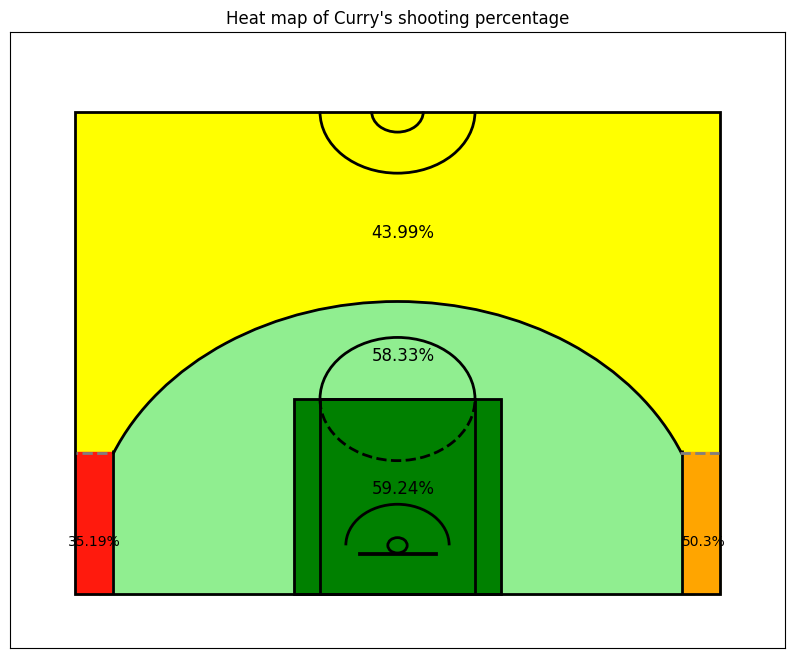

In [149]:
fig1, ax = plt.subplots(figsize=(10, 8))

colors = {'made': 'green', 'missed': 'red'}
c = subdata['result'].apply(lambda x: colors.get(x, 'black'))

# sns.scatterplot(x='xx', y='yy', hue='result', data=filter_subdata, palette=colors)

ax.set_title("Heat map of Curry's shooting percentage")
ax.set_xlabel('')
ax.set_ylabel('')


#三分线外
ax.text(-20, 300, three_point_acc, fontsize=12, color='black')
inner_box_area = Rectangle((-250, -47.5), 500, 470, color='yellow', alpha=1)
ax.add_patch(inner_box_area)


# 三分内其他区域
ax.text(-20, 180, two_point_acc, fontsize=12, color='black')
hoop_area = Circle((0,2),radius=235,linewidth=2,color='lightgreen', alpha=1)
ax.add_patch(hoop_area)


#左下角投篮区
ax.text(-255, 0, left_corner_acc, fontsize=10, color='black')
left_corner_three = Rectangle((-250, -47.5), 28, 138, color=(1.0,0.1,0.05), alpha=1)
ax.add_patch(left_corner_three)


#右下角投篮区
ax.text(220, 0, right_corner_acc, fontsize=10, color='black')
right_corner_three = Rectangle((250, -47.5), -28, 138, color='orange', alpha=1)
ax.add_patch(right_corner_three)


#禁区
ax.text(-20, 50, inner_box_acc, fontsize=12, color='black')
inner_box_area = Rectangle((-80, -47.5), 160, 190, color='green', alpha=1)
ax.add_patch(inner_box_area)


#填充白色
bottom_white = Rectangle((-230, -147.5), 600, 98, color='white', alpha=1)
ax.add_patch(bottom_white)


# 篮球场框线
draw_court1(ax, outer_lines=True)

# 隐藏x轴和y轴
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# img = mpimg.imread('./photo.jpg')
# ax.imshow(img, aspect='auto', extent=(-300, -230, -100, -10)) 

ax.set_xlim(-300, 300)
ax.set_ylim(-100, 500)
plt.show()

In [150]:
fig1.savefig("shot_heatmap.png", dpi=300, bbox_inches='tight')

In [156]:
from PIL import Image

# Load the images
main_image_path = './archive/Shooting_stats_chart.png'
sidebar_image1_path = './shot_heatmap.png'
sidebar_image2_path = './shot_scatterplot.png'

# Load the images again
main_image = Image.open(main_image_path)
sidebar_image1 = Image.open(sidebar_image1_path)
sidebar_image2 = Image.open(sidebar_image2_path)

# Resize sidebar images to make them smaller than the main image
sidebar_image1.thumbnail((main_image.width // 2, main_image.height // 2))
sidebar_image2.thumbnail((main_image.width // 2, main_image.height // 2))

# Calculate new total height with a space between sidebar images and above them
space_between_images = 10  # space between sidebar images
space_above_images = 150    # space above the sidebar images
total_height = max(main_image.height, sidebar_image1.height + sidebar_image2.height + space_between_images + space_above_images)

# Create a new image with a white background
combined_image = Image.new('RGB', (total_width, total_height), color='white')

# Paste the main image and the sidebar images onto the combined image with space between and above them
combined_image.paste(main_image, (0, 0))
combined_image.paste(sidebar_image1, (main_image.width, space_above_images))
combined_image.paste(sidebar_image2, (main_image.width, sidebar_image1.height + space_between_images + space_above_images))

# Save the combined image
combined_image_path_with_space_below = './combined_image_with_space_below.png'
combined_image.save(combined_image_path_with_space_below)
